In [84]:
import geopandas as gpd
import pandas as pd
import h3pandas

## Loading street image coordinates

In [44]:
df = pd.read_csv('data/csv/newParanaque_saved_coordinates.csv')
df

,X,Y
0,120.984143,14.533076
1,120.983244,14.520337
2,121.001600,14.451343
3,121.001111,14.445416
4,121.000857,14.443456
...,...,...
567,121.000234,14.476116
568,121.000889,14.522531
569,121.000995,14.520438
570,121.000956,14.518549


In [45]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
len(street_points)

572

In [46]:
street_points.insert(0, 'point_id', range(0, 0 + len(street_points)))

## Displaying Paranaque map

In [47]:
philippines = gpd.read_file('maps/phl_admbnda_adm4_psa_namria_20231106.zip')

<AxesSubplot: >

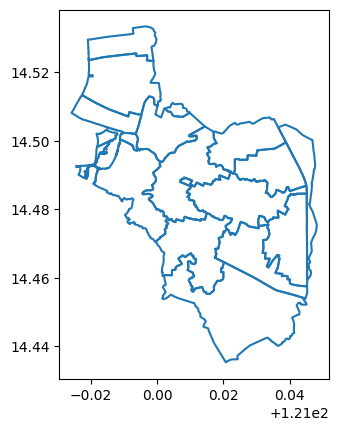

In [48]:

paranaque = philippines[philippines['ADM3_EN'] == 'City of Parañaque']
paranaque.boundary.plot()

## Plotting the street points onto the map

<AxesSubplot: >

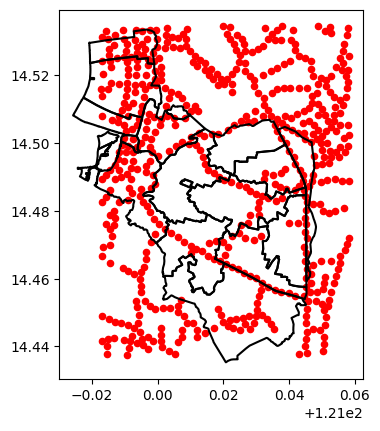

In [49]:
base = paranaque.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')

In [50]:
clipped = gpd.clip(street_points, paranaque)
len(clipped)

243

In [51]:
clipped

,point_id,geometry
239,239,POINT (121.03551 14.44519)
228,228,POINT (121.03436 14.44665)
222,222,POINT (121.03317 14.44805)
295,295,POINT (121.04462 14.45474)
274,274,POINT (121.04171 14.45499)
...,...,...
32,32,POINT (121.00479 14.50729)
550,550,POINT (120.99897 14.50770)
15,15,POINT (121.00275 14.50796)
531,531,POINT (120.99729 14.50851)


<AxesSubplot: >

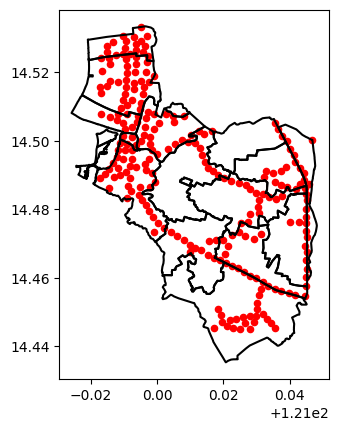

In [52]:
base = paranaque.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=20, color='red')

In [53]:
len(clipped)

243

In [54]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/paranaque_filtered_coordinates.csv', index=False)

## Analyzing street point data

In [55]:
joined = gpd.sjoin(paranaque, street_points, how='left', predicate='contains')
joined.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,index_right,point_id
35242,Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",520,520
35242,Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",528,528
35242,Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",459,459
35242,Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",510,510
35242,Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",476,476


In [56]:
average_images = joined.groupby('ADM4_EN')['point_id'].count().mean()
average_images

15.1875

In [57]:
std_images = joined.groupby('ADM4_EN')['point_id'].count().std()
std_images

10.368019740207545

In [58]:
grouped = joined.groupby('ADM4_EN')['point_id'].count().sort_values(ascending=True)
grouped

ADM4_EN
Vitalez                   1
La Huerta                 3
Merville                  3
Don Galo                  9
San Martin de Porres     10
San Isidro               11
Marcelo Green Village    12
Moonwalk                 12
Sun Valley               12
Don Bosco                16
Santo Niño               18
Baclaran                 19
San Antonio              20
B. F. Homes              26
Tambo                    33
San Dionisio             38
Name: point_id, dtype: int64

Text(0.5, 1.0, 'Number of images per barangay in Paranaque')

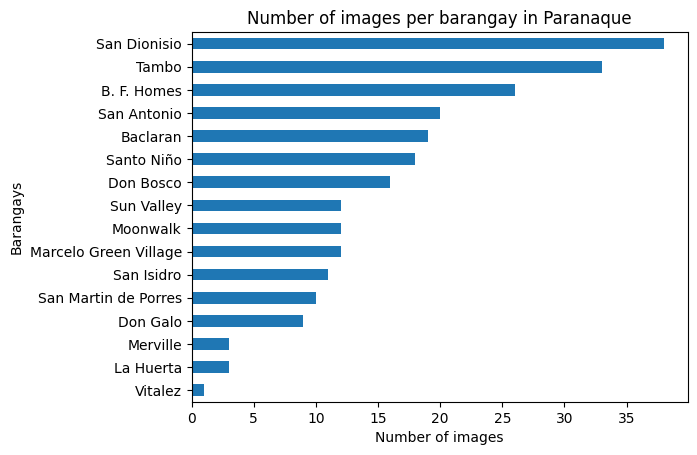

In [59]:
ax = grouped.plot.barh()
ax.set_xlabel('Number of images')
ax.set_ylabel('Barangays')
ax.set_title('Number of images per barangay in Paranaque')

In [60]:
total_street_points = joined.groupby('ADM4_EN')['geometry'].count().sum()
total_street_points

243

In [61]:
paranaque.set_index('ADM4_EN', inplace=True)
paranaque.head()

,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
ADM4_EN,,,,,,,,,,,,,,,,,
Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533..."
Don Galo,PH1307604002,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074075,0.000128,1.521667,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ..."
La Huerta,PH1307604003,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.020239,0.000016,0.195954,"POLYGON ((120.99000 14.50229, 120.99035 14.502..."
San Dionisio,PH1307604004,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.172941,0.000327,3.905538,"POLYGON ((120.98936 14.50019, 120.98955 14.500..."
Santo Niño,PH1307604005,Santo Nino,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074894,0.000202,2.411879,"POLYGON ((120.99854 14.51277, 120.99893 14.512..."


In [62]:
paranaque['streetimage_count'] = joined.groupby('ADM4_EN')['point_id'].count()
paranaque.head()

c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
ADM4_EN,,,,,,,,,,,,,,,,,,
Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",19
Don Galo,PH1307604002,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074075,0.000128,1.521667,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ...",9
La Huerta,PH1307604003,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.020239,0.000016,0.195954,"POLYGON ((120.99000 14.50229, 120.99035 14.502...",3
San Dionisio,PH1307604004,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.172941,0.000327,3.905538,"POLYGON ((120.98936 14.50019, 120.98955 14.500...",38
Santo Niño,PH1307604005,Santo Nino,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074894,0.000202,2.411879,"POLYGON ((120.99854 14.51277, 120.99893 14.512...",18


<AxesSubplot: >

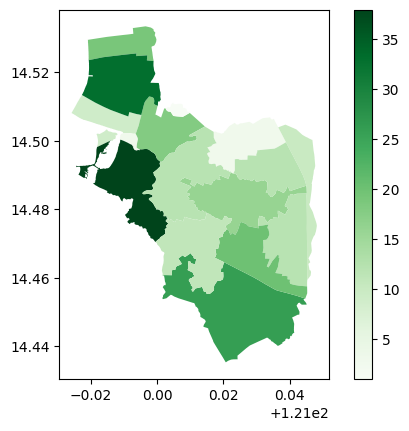

In [98]:
paranaque.plot(column='streetimage_count', cmap='Greens', legend=True)

In [99]:
paranaque_h3 = paranaque.h3.polyfill(4)
paranaque_h3.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count,h3_polyfill
0,Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",19,[]
1,Don Galo,PH1307604002,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074075,0.000128,1.521667,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ...",9,[]
2,La Huerta,PH1307604003,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.020239,0.000016,0.195954,"POLYGON ((120.99000 14.50229, 120.99035 14.502...",3,[]
3,San Dionisio,PH1307604004,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.172941,0.000327,3.905538,"POLYGON ((120.98936 14.50019, 120.98955 14.500...",38,[]
4,Santo Niño,PH1307604005,Santo Nino,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074894,0.000202,2.411879,"POLYGON ((120.99854 14.51277, 120.99893 14.512...",18,[]


In [100]:
paranaque.reset_index(inplace=True)
paranaque.head()

,index,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
0,0,Baclaran,PH1307604001,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.060561,0.000133,1.588166,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",19
1,1,Don Galo,PH1307604002,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074075,0.000128,1.521667,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ...",9
2,2,La Huerta,PH1307604003,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.020239,0.000016,0.195954,"POLYGON ((120.99000 14.50229, 120.99035 14.502...",3
3,3,San Dionisio,PH1307604004,NaN,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.172941,0.000327,3.905538,"POLYGON ((120.98936 14.50019, 120.98955 14.500...",38
4,4,Santo Niño,PH1307604005,Santo Nino,City of Parañaque,PH1307604,Metropolitan Manila Fourth District,PH13076,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.074894,0.000202,2.411879,"POLYGON ((120.99854 14.51277, 120.99893 14.512...",18


In [104]:
p_geom = gpd.GeoDataFrame(paranaque['geometry'])
p_geom

,geometry
0,"POLYGON ((120.99756 14.53322, 120.99802 14.533..."
1,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ..."
2,"POLYGON ((120.99000 14.50229, 120.99035 14.502..."
3,"POLYGON ((120.98936 14.50019, 120.98955 14.500..."
4,"POLYGON ((120.99854 14.51277, 120.99893 14.512..."
5,"POLYGON ((120.99374 14.52474, 120.99490 14.524..."
6,"POLYGON ((121.01026 14.46707, 121.01027 14.467..."
7,"POLYGON ((121.02236 14.49083, 121.02252 14.490..."
8,"POLYGON ((121.04518 14.48440, 121.04517 14.484..."
9,"POLYGON ((121.03413 14.50682, 121.03421 14.506..."


In [111]:
p_geom.set_crs('epsg: 4326', allow_override=True)

,geometry
0,"POLYGON ((120.99756 14.53322, 120.99802 14.533..."
1,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ..."
2,"POLYGON ((120.99000 14.50229, 120.99035 14.502..."
3,"POLYGON ((120.98936 14.50019, 120.98955 14.500..."
4,"POLYGON ((120.99854 14.51277, 120.99893 14.512..."
5,"POLYGON ((120.99374 14.52474, 120.99490 14.524..."
6,"POLYGON ((121.01026 14.46707, 121.01027 14.467..."
7,"POLYGON ((121.02236 14.49083, 121.02252 14.490..."
8,"POLYGON ((121.04518 14.48440, 121.04517 14.484..."
9,"POLYGON ((121.03413 14.50682, 121.03421 14.506..."


In [112]:
paranaque_h3 = p_geom.h3.polyfill(4)
paranaque_h3.head()

,geometry,h3_polyfill
0,"POLYGON ((120.99756 14.53322, 120.99802 14.533...",[]
1,"MULTIPOLYGON (((120.98538 14.50277, 120.98538 ...",[]
2,"POLYGON ((120.99000 14.50229, 120.99035 14.502...",[]
3,"POLYGON ((120.98936 14.50019, 120.98955 14.500...",[]
4,"POLYGON ((120.99854 14.51277, 120.99893 14.512...",[]


C:\Users\dbyon\AppData\Local\Temp\ipykernel_28752\2394884078.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
EPSG:4326
                 index     pop_est continent      name iso_a3  gdp_md_est  \
h3_polyfill                                                                 
849b41bffffffff      0    889953.0   

c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:564: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


                 index      pop_est  gdp_md_est  \
h3_02                                             
82001ffffffffff     36  288747070.0     3399752   
82002ffffffffff    441  112305816.0     8470056   
82004ffffffffff    132     337350.0       18306   
820067fffffffff     66     168675.0        9153   
82006ffffffffff    748    1911650.0      103734   
...                ...          ...         ...   
82f397fffffffff   1113      31430.0        6286   
82f39ffffffffff   4452     125720.0       25144   
82f3a7fffffffff   7791     220010.0       44002   
82f3affffffffff   7791     220010.0       44002   
82f3b7fffffffff   2703      76330.0       15266   

                                                          geometry  
h3_02                                                               
82001ffffffffff  POLYGON ((46.68072 79.52276, 55.75077 79.55833...  
82002ffffffffff  POLYGON ((23.09478 78.07801, 30.10563 78.74785...  
82004ffffffffff  POLYGON ((-21.99468 83.41761, -17.90816 84.

<AxesSubplot: >

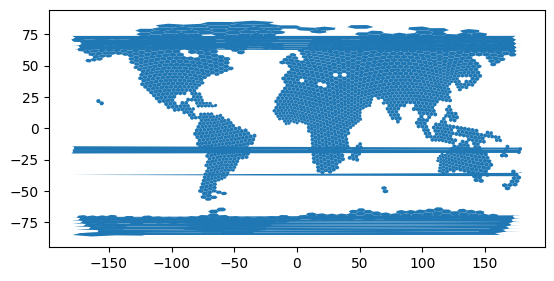

In [113]:
import geopandas as gpd
import h3pandas

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.set_crs('epsg: 4326')
print(gdf.head())
print(gdf.crs)

# Resample to H3 cells
gdf = gdf.h3.polyfill_resample(4)
print(gdf)
gdf = gdf.h3.h3_to_parent_aggregate(2)
print(gdf)
gdf.plot()

In [87]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']